In [7]:
import numpy as np
import math 
import matplotlib.pyplot as plt
%matplotlib notebook

# **Ларичева Мария, БПМ-161**
_Вариант 12_
<br>_Лабораторная работа №2_

**Задача 2.7.** Локализовать корни уравнения f(x)=0. Найти их с точностью до $ε = 10^{-5}$ и $ε = 10^{-12}$, используя метод Ньютона, упрощенный метод Ньютона и метод секущих. Сравнить скорость сходимости методов (по числу итераций) для каждого значения $ε$.
<br>
<br>
$f(x) = x^{3} - 0.9x^{2} - x - 0.1$

Локализуем корни уравнения. Для того, чтобы найти отрезок локализации, изобразим график $f(x)$

In [8]:
def f(x):
    return x**3 - 0.9*(x**2) - x - 0.1
def der_f(x):
    return 3*(x**2) - 1.8*x - 1

<IPython.core.display.Javascript object>


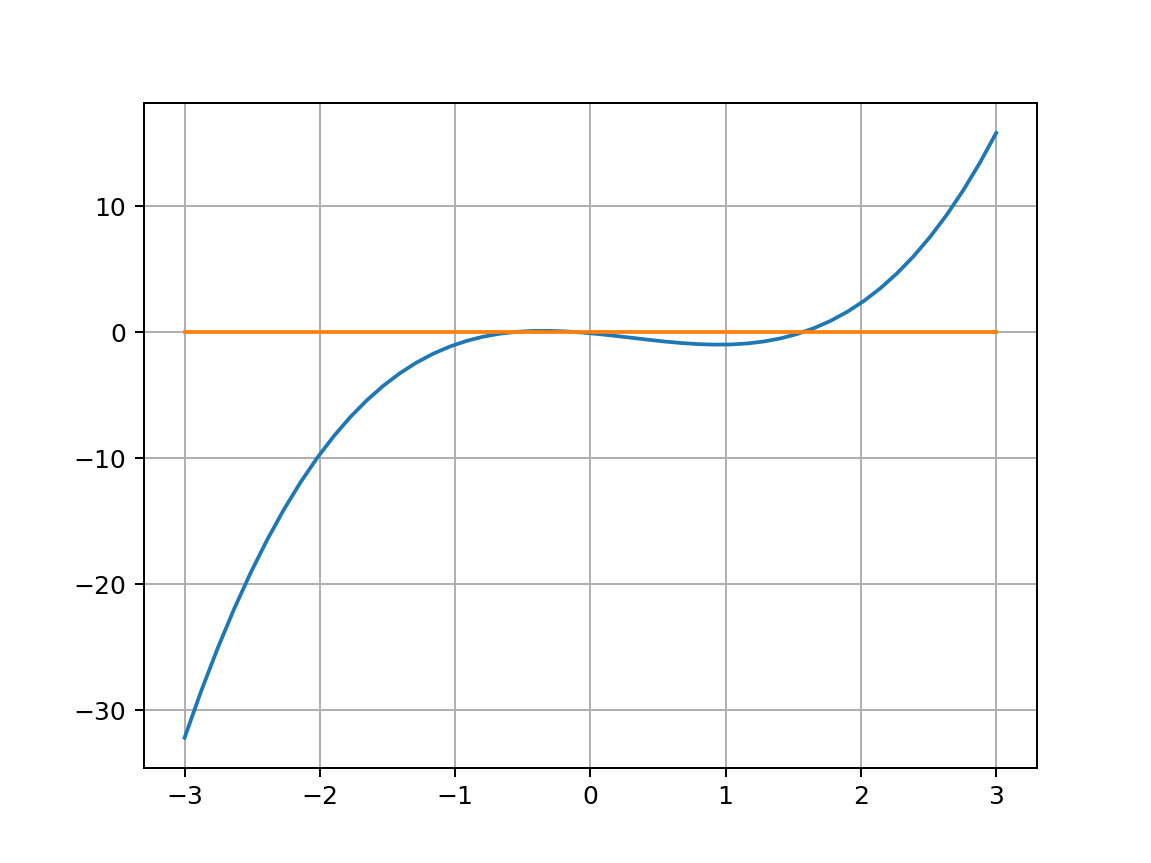

In [9]:
x1 = np.linspace(-3, 3)
zeros = np.zeros(50)
f1 = [f(x) for x in x1]

p = plt.plot(x1, f1)
z = plt.plot(x1,zeros)
plt.grid(True)
#можно локализовать на отрезке 

Для локализации выберем отрезок [1,2]. Из графика видно, что на нем расположен единственный корень уравнения $f(x) = 0$

Классический **метод Ньютона** заключается в построении последовательных приближений с помощью касательных. Возьмем в качестве первого приближения $x_0$ левый конец отрезка, т.е. 1. Каждое следующее приближение рассчитывается как точка пересечения касательной, проведенной в точке $f(x_n)$, и оси $x$. 
<br>
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$


In [11]:
#функция решения уравнения методом Ньютона
def N_solver(x0,eps, max_iter = 1000):
    for i in range(max_iter):
        x = x0 - (f(x0)/der_f(x0))
        if abs(x-x0) < eps:
            print("numb of iterations: ",i)
            return x
        x0 = x
    raise ValueError('error')

Найдем корни с заданной точностью:

In [60]:
x1 = N_solver(1, 1e-5)
x2 = N_solver(1, 1e-12)
print("x1 = ", x1)
print("x2 = ", x2)

numb of iterations:  8
numb of iterations:  10
x1 =  1.575160256945766
x2 =  1.5751602569429586


Для второго значения $ε$ число итераций, необходимых для вычисления корня уравнения с заданной точностью, больше (10 итераций по сравнению с 8)

Решим уравнение **упрощенным методом Ньютона**. Его отличие от классического метода состоит в том, что в формуле производная в точке $x_n$ заменена на производную в точке $x_0$. Такое допущение можно сделать, если в окрестности решения производная непрерывна. 
<br>
$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_0)}$

In [15]:
#функция решения уравнения упрощенным методом Ньютона
def N_solver_modified(x0,eps, max_iter = 1000):
    x_start = x0
    for i in range(max_iter):
        x = x0 - (f(x0)/der_f(x_start))
        if abs(x-x0) < eps:
            print("numb of iterations: ",i)
            return x
        x0 = x
    raise ValueError('error')

Найдем корни с заданной точностью. Возьмем в качестве начального значения $x_0 = 1.5$

In [61]:
x1 = N_solver_modified(1.5, 1e-5)
x2 = N_solver_modified(1.5, 1e-12)
print("x1 = ", x1)
print("x2 = ", x2)

numb of iterations:  5
numb of iterations:  15
x1 =  1.5751588063091666
x2 =  1.5751602569428975


Число итераций при втором значении $ε$ выше в три раза (5 и 15 соответственно)

Решим уравнение **методом секущих**. Он получается из метода Ньютона заменой производной на разностное приближение $\frac{f(x_n) - f(x_{n-1})}{x_n - x{n-1}}$. Также метод является двухшаговым, поэтому необходимо вычислять значения двух предыдущих итераций
<br>
$x_{n+1} = x_n - \frac{f(x_n) - f(x_{n-1})}{x_n - x{n-1}}f(x_n)$

In [18]:
def secant(x0,x1,eps, max_iter = 1000):
    fx1 = f(x1)
    fx0 = f(x0)
    for i in range(max_iter):
        x = x1 - fx1*(x0-x1)/(fx0-fx1)
        if abs(x-x0) < eps:
            print("numb of iterations: ",i)
            return x
        x0 = x1
        x1 = x
        fx0 = fx1
        fx1 = f(x)
    raise ValueError('error')

Найдем корни с заданной точностью. Возьмем в качестве начального значения $x_0 = 1.5$

In [62]:
x1 = secant(1, 1.5, 1e-5)
x2 = secant(1, 1.5, 1e-12)
print("x1 = ", x1)
print("x2 = ", x2)

numb of iterations:  5
numb of iterations:  7
x1 =  1.5751602569429402
x2 =  1.5751602569429586


Число итераций при втором значении $ε$ выше (7 по сравнению с 5)

Сравнивая число итераций, можно сделать вывод, что наивысшая скорость сходимости наблюдается при использовании метода секущих. Упрощенный метод Ньютона обеспечивает быструю сходимость при расчетах с небольшой точностью, однако в случае поиска корня с высокой точностью выгоднее использовать классический метод Ньютона.

**Задача 2.8.** Найти приближенно все (в том числе комплексные) корни уравнения f(x)=0 с точностью $ε = 10^{-5}$,используя метод Ньютона.
УКАЗАНИЕ. Для поиска комплексных корней следует использовать комплексные начальные приближения.
<br>
$f_1(x) = x^5+3x^4+2x^3-1$

Локализуем функцию и найдем действительные корни

In [36]:
def N_solver_1(x0,eps, max_iter = 1000):
    for i in range(max_iter):
        x = x0 - (f1(x0)/der_f1(x0))
        if abs(x-x0) < eps:
            print("numb of iterations: ",i)
            return x
        x0 = x
    raise ValueError('error')

In [21]:
def f1(x):
    return x**5 + 3*x**4 + 2*x**3 - 1
def der_f1(x):
    return 5*x**4 + 12*x**3 + 6*x**2

<IPython.core.display.Javascript object>


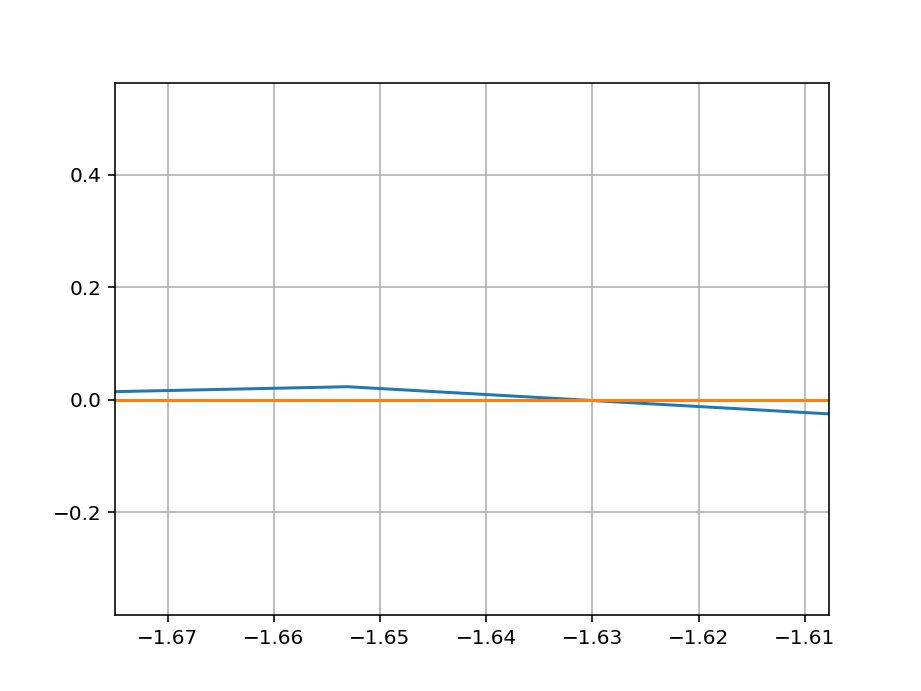

In [23]:
f2 = [f1(x) for x in x1]

plt.figure(num=None, dpi=80, facecolor='w', edgecolor='k')
p1 = plt.plot(x1, f2)
z1 = plt.plot(x1,zeros)
plt.grid(True)

Два корня $x_1$ и $x_2$ расположены на отрезке [-2,-1.5]. 
Чтобы найти первый корень, возьмем начальное приближение $x_0 = -1.72$

In [63]:
x1 = N_solver_1(-1.72, 1e-5)
print("x1 = ", x1)

numb of iterations:  4
x1 =  -1.754877666246742


Возьмем приближение $x_0 = -1.64$ для нахождения второго корня

In [64]:
x2 = N_solver_1(-1.66, 1e-5)
print("x2 = ", x2)

numb of iterations:  4
x2 =  -1.618033988749895


В предыдущих случаях выбор столь точных начальных приближений обсуловлен тем, что метод Ньютона плохо работает в случае близких корней, зачастую не различая их

Найдем третий корень $x_3$ на отрезке [0.5, 1]. Возьмем в качестве начального приближения $x_0 = 0.5$

In [65]:
x3 = N_solver_1(0.5, 1e-5)
print("x3 = ", x3)

numb of iterations:  4
x3 =  0.6180339887498948


Два нахождения комплексных корней возьмем комплексное начальное приближение. 
Чтобы найти первый корень, возьмем начальное приближение $x_0 = 0+1j$

In [66]:
x4 = N_solver_1(complex(0,1), 1e-5)
print("x4 = ", x4)

numb of iterations:  4
x4 =  (-0.12256116687684143+0.744861766619951j)


Поскольку полученный корень $x_4$ является корнем уравнения, то сопряженный ему также будет являться корнем. Поэтому возьмем в качестве начального приближения $x_0$ = 0 - 1j и получим второй сопряженный корень $x_5$

In [67]:
x5 = N_solver_1(complex(0,-1), 1e-5)
print("x5 = ", x5)

numb of iterations:  4
x5 =  (-0.12256116687684143-0.744861766619951j)
